In [19]:
#import libraries
#!pip install pandas-datareader
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image
import numpy as np
import pandas_datareader as web
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics  
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import math


In [20]:
#import os
#import matplotlib.pyplot as plt
#from bs4 import BeautifulSoup
#from urllib.request import urlopen, Request
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#import nltk
#nltk.download('vader_lexicon')

In [21]:
#List of all relevant tickers on the S n P 500
Tickers = ["MMM" , "AOS" , "ABT" , "ABBV" , "ABMD" , "ACN" , "ATVI" , "ADBE" , "AAP" , "AMD" , "AES" , "AFL" , "A" , "APD" , "AKAM" , "ALK" , "ALB" , "ARE" , "ALXN" , "ALGN" , "ALLE" , "LNT" , "ALL" , "GOOGL" , "GOOG" , "MO" , "AMZN" , "AMCR" , "AEE" , "AAL" , "AEP" , "AXP" , "AIG" , "AMT" , "AWK" , "AMP" , "ABC" , "AME" , "AMGN" , "APH" , "ADI" , "ANSS" , "ANTM" , "AON" , "APA" , "AIV" , "AAPL" , "AMAT" , "APTV" , "ADM" , "ANET" , "AJG" , "AIZ" , "T" , "ATO" , "ADSK" , "ADP" , "AZO" , "AVB" , "AVY" , "BKR" , "BLL" , "BAC" , "BAX" , "BDX" ,  "BBY" , "BIO" , "BIIB" , "BLK" , "BA" , "BKNG" , "BWA" , "BXP" , "BSX" , "BMY" , "AVGO" , "BR" ,  "CHRW" , "COG" , "CDNS" , "CPB" , "COF" , "CAH" , "KMX" , "CCL" , "CARR" , "CAT" , "CBOE" , "CBRE" , "CDW" , "CE" , "CNC" , "CNP" , "CERN" , "CF" , "SCHW" , "CHTR" , "CVX" , "CMG" , "CB" , "CHD" , "CI" , "CINF" , "CTAS" , "CSCO" , "C" , "CFG" , "CTXS" , "CME" , "CMS" , "KO" , "CTSH" , "CL" , "CMCSA" , "CMA" , "CAG" , "COP" , "ED" , "STZ" , "CPRT" , "GLW" , "CTVA" , "COST" , "COTY" , "CCI" , "CSX" , "CMI" , "CVS" , "DHI" , "DHR" , "DRI" , "DVA" , "DE" , "DAL" , "XRAY" , "DVN" , "DXCM" , "FANG" , "DLR" , "DFS" , "DISCA" , "DISCK" , "DISH" , "DG" , "DLTR" , "D" , "DPZ" , "DOV" , "DOW" , "DTE" , "DUK" , "DRE" , "DD" , "DXC" , "EMN" , "ETN" , "EBAY" , "ECL" , "EIX" , "EW" , "EA" , "EMR" , "ETR" , "EOG" , "EFX" , "EQIX" , "EQR" , "ESS" , "EL" , "RE" , "EVRG" , "ES" , "EXC" , "EXPE" , "EXPD" , "EXR" , "XOM" , "FFIV" , "FB" , "FAST" , "FRT" , "FDX" , "FIS" , "FITB" , "FRC" , "FE" , "FISV" , "FLT" , "FLIR" , "FLS" , "FMC" , "F" , "FTNT" , "FTV" , "FBHS" , "FOXA" , "FOX" , "BEN" , "FCX" , "GPS" , "GRMN" , "IT" , "GD" , "GE" , "GIS" , "GM" , "GPC" , "GILD" , "GPN" , "GL" , "GS" , "GWW" , "HRB" , "HAL" , "HBI" , "HIG" , "HAS" , "HCA" , "PEAK" , "HSIC" , "HES" , "HPE" , "HLT" , "HFC" , "HOLX" , "HD" , "HON" , "HRL" , "HST" , "HWM" , "HPQ" , "HUM" , "HBAN" , "HII" , "IEX" , "IDXX" , "INFO" , "ITW" , "ILMN" , "INCY" , "IR" , "INTC" , "ICE" , "IBM" , "IFF" , "IP" , "IPG" , "INTU" , "ISRG" , "IVZ" , "IPGP" , "IQV" , "IRM" , "JBHT" , "JKHY" , "J" , "SJM" , "JNJ" , "JCI" , "JPM" , "JNPR" , "KSU" , "K" , "KEY" , "KEYS" , "KMB" , "KIM" , "KMI" , "KLAC" , "KSS" , "KHC" , "KR" , "LB" , "LHX" , "LH" , "LRCX" , "LW" , "LVS" , "LEG" , "LDOS" , "LEN" , "LLY" , "LNC" , "LIN" , "LYV" , "LKQ" , "LMT" , "L" , "LOW" , "LYB" , "MTB" , "MRO" , "MPC" , "MKTX" , "MAR" , "MMC" , "MLM" , "MAS" , "MA" , "MXIM" , "MKC" , "MCD" , "MCK" , "MDT" , "MRK" , "MET" , "MTD" , "MGM" , "MCHP" , "MU" , "MSFT" , "MAA" , "MHK" , "TAP" , "MDLZ" , "MNST" , "MCO" , "MS" , "MSI" , "MSCI" , "NDAQ" , "NOV" , "NTAP" , "NFLX" , "NWL" , "NEM" , "NWSA" , "NWS" , "NEE" , "NLSN" , "NKE" , "NI" , "NSC" , "NTRS" , "NOC" , "NLOK" , "NCLH" , "NRG" , "NUE" , "NVDA" , "NVR" , "ORLY" , "OXY" , "ODFL" , "OMC" , "OKE" , "ORCL" , "OTIS" , "PCAR" , "PKG" , "PH" , "PAYX" , "PAYC" , "PYPL" , "PNR" , "PBCT" , "PEP" , "PKI" , "PRGO" , "PFE" , "PM" , "PSX" , "PNW" , "PXD" , "PNC" , "PPG" , "PPL" , "PFG" , "PG" , "PGR" , "PLD" , "PRU" , "PEG" , "PSA" , "PHM" , "PVH" , "QRVO" , "QCOM" , "PWR" , "DGX" , "RL" , "RJF" , "RTX" , "O" , "REG" , "REGN" , "RF" , "RSG" , "RMD" , "RHI" , "ROK" , "ROL" , "ROP" , "ROST" , "RCL" , "SPGI" , "CRM" , "SBAC" , "SLB" , "STX" , "SEE" , "SRE" , "NOW" , "SHW" , "SPG" , "SWKS" , "SLG" , "SNA" , "SO" , "LUV" , "SWK" , "SBUX" , "STT" , "STE" , "SYK" , "SIVB" , "SYF" , "SNPS" , "SYY" , "TMUS" , "TROW" , "TTWO" , "TPR" , "TGT" , "TEL" , "FTI" , "TDY" , "TFX" , "TXN" , "TXT" , "BK" , "CLX" , "COO" , "HSY" , "MOS" , "TRV" , "DIS" , "TMO" , "TJX" , "TSCO" , "TT" , "TDG" , "TFC" , "TWTR" , "TYL" , "TSN" , "USB" , "UDR" , "ULTA" , "UAA" , "UA" , "UNP" , "UAL" , "UNH" , "UPS" , "URI" , "UHS" , "UNM" , "VLO" , "VAR" , "VTR" , "VRSN" , "VRSK" , "VZ" , "VRTX" , "VFC" , "VIAC" , "V" , "VNO" , "VMC" , "WRB" , "WAB" , "WBA" , "WMT" , "WM" , "WAT" , "WEC" , "WFC" , "WELL" , "WST" , "WDC" , "WU" , "WRK" , "WY" , "WHR" , "WMB" , "WLTW" , "WYNN" , "XEL" , "XRX" , "XLNX" , "XYL" , "YUM" , "ZBRA" , "ZBH" , "ZION" , "ZTS"]

In [22]:
def price_forecast(raw_df, close, time, lookback, frontal, stock_num):
  
  #Principal Component Analysis
  pca_one = PCA(n_components = 5)#training
  pca_two = PCA(n_components = 5)#testing

  #Training data = t - frontal - lookback
  x_training = raw_df[time-frontal-lookback:time-frontal,:]
  x_training = MinMaxScaler().fit_transform(x_training)
  x_training = pca_one.fit_transform(x_training)
  y_training = close.iloc[time-frontal+1:time+1,stock_num]

  #Testing = t - lookback
  x_testing = raw_df[time-lookback:time,:]
  x_testing = MinMaxScaler().fit_transform(x_testing)
  x_testing = pca_two.fit_transform(x_testing)
  y_testing = close.iloc[time+1 : time+frontal+1, stock_num]

  RF = RandomForestRegressor(n_estimators=50,min_samples_leaf=10, max_depth=5, max_features=5, min_samples_split=5, bootstrap = True, criterion='mse')#n_estimators=15, bootstrap=True, 
  RF.fit(x_training, y_training)
  predicted = RF.predict(x_testing)

  return predicted, y_testing

In [23]:
#comparisonn set up between actual and predicted.....
def prediction_tabulator(full_features_df,closing_prices_df):
  predictions = []
  actuals = [] 
  
  for stocks in range(closing_prices_df.shape[1]):
    stock_predictions = []
    stock_actuals = []
    
    for dates in range(60, df_closing.shape[0], 30): 
      pred, act = price_forecast(full_features_df, closing_prices_df, dates, 30, 30, stocks)
      stock_predictions.append(pred)
      stock_actuals.append(act)

    stock_predictions = np.concatenate(stock_predictions)
    stock_actuals = np.concatenate(stock_actuals)

    predictions.append(stock_predictions)
    actuals.append(stock_actuals)

  return predictions, actuals

In [24]:
#Mean Returns function
def mean_returns(df, length): 
  mu = df.sum(axis = 0)/length
  return mu

In [25]:
from datetime import timedelta
from dateutil.parser import parse

#date/time parser
def datetime_parser(date, delta):
    m, y = (date.month+delta) % 12, date.year + ((date.month)+delta-1) // 12
    if not m: m = 12
    d = min(date.day, [31,
        29 if y%4==0 and not y%400==0 else 28,31,30,31,30,31,31,30,31,30,31][m-1])
    new_date = (date.replace(day=d,month=m, year=y))
    return parse(new_date.strftime('%Y-%m-%d'))



In [ ]:
def data_splitter(dataframe, lookback, horizon,
                    step, cummulative = False):


    if cummulative:
        c = lookback
        step = horizon
        
    initial = min(dataframe.index)
    windows = []
    horizons = []

    while initial <= datetime_parser(max(dataframe.index), -lookback):
        window_begin = initial
        windowEnd = datetime_parser(window_begin, lookback)
        if cummulative:
            window_begin = min(dataframe.index)
            windowEnd = datetime_parser(window_begin, c) + timedelta(days=1)
            c += horizon
        horizonBegin = windowEnd + timedelta(days=1)
        horizonEnd = datetime_parser(horizonBegin, horizon)

        lookbackWindow = dataframe[window_begin:windowEnd]
        horizonWindow = dataframe[horizonBegin:horizonEnd]

        windows.append(lookbackWindow)
        horizons.append(horizonWindow)

        initial = datetime_parser(initial, step)

    return windows, horizons

In [26]:
from numpy.linalg import norm

def actual_return(actual_returns, w):
  actual_returns = actual_returns 
  mean_return = mean_returns(actual_returns, actual_returns.shape[0])
  actual_covariance = actual_returns.cov()

  portfolio_returns = mean_return.T.dot(w)
  portfolio_variance = w.T.dot(actual_covariance).dot(w)
  return portfolio_returns, portfolio_variance



In [ ]:
from scipy.optimize import minimize, Bounds, LinearConstraint
from numpy.linalg import norm
#Input entire predicted returns df, actual returns df, Begining date
def meanvariance_optimizer(predicted_returns, actual_returns):
  mean_return = mean_returns(predicted_returns, predicted_returns.shape[0])
  predicted_covariance = predicted_returns.cov()#497x497
  actual_covariance = actual_returns.cov()
  error =  actual_returns - predicted_returns
  mean_errors = mean_error(error, error.shape[0])
  
  #Cost Function
  def f(w):
    return (w.T.dot(actual_covariance).dot(w) - mean_return.T.dot(w) - mean_errors.T.dot(w))#.T.dot(w))
  #out custom maximises 

  #Bounds of Weights
  opt_bounds = Bounds(0, 1)

  #Equality Constraints
  def h(w):
    return sum(w) - 1

  #Constraints Dictionary
  cons = ({
      'type' : 'eq',
      'fun' : lambda w: h(w)
  })

  #Solver
  sol = minimize(f,
                 x0 = np.ones(mean_return.shape[0]),
                 constraints = cons,
                 bounds = opt_bounds,
                 options = {'disp': False})
                 #tol=10e-10)


  #Predicted Results
  w = sol.x
  predicted_portfolio_returns = w.dot(mean_return)
  portfolio_STD = w.T.dot(predicted_covariance).dot(w)
  
  #Actual Results
  portfolio_actual_returns, portfolio_actual_variance = actual_return(actual_returns, w)
  sharpe_ratio = portfolio_actual_returns/np.std(portfolio_actual_variance)

  ret_dict = {'weights' : w,
              'predicted_returns' : predicted_portfolio_returns,
              'predicted_variance' : portfolio_STD,
              'actual_returns' : portfolio_actual_returns,
              'actual_variance' : portfolio_actual_variance,
              'sharpe_ratio': sharpe_ratio}
  return ret_dict 
  #print(ret_dect)
  

In [27]:
#Sharpe calculator
def metrics_vol(returns): 
  stdev = returns.std() 
  annualized_vol = stdev.item() / math.sqrt(252)

  return annualized_vol

In [28]:
def mean_error(df, length): 
  mu = df.sum(axis = 0)/length
  return mu

In [29]:
#Standard deviation calculator
def metrics_sharpe(returns): 
  sharpe = returns.mean() / returns.std()
  annualized_sharpe = sharpe.item() / math.sqrt(252)

  return annualized_sharpe


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
#Randomly pick N number of stocks to be put in the portfolio
portfolio_count = 0

Equity_perportfolio = []

Portfolio_sequence = []

MSE_values = []

RMSE_values = []

MAE_values = []

Turnover_values = []

Optimization_error = []

Excessreturn_vals = []

Sharpe_vals = []

standarddev_vals = []  

while portfolio_count < 5000:
  df = pd.read_csv('StockPrices_SnP500_Final.csv')
  #convert to date format.
  df['Date']= pd.to_datetime(df['Date'], errors='coerce')
  #Sentiment data
  sentiment_df = pd.read_csv('Sentiment_scores.csv')
  #convert to date format.
  sentiment_df['Date']= pd.to_datetime(df['Date'], errors='coerce')
  # declaring list
  list = Tickers
  portfolio_count = portfolio_count + 1
  # initializing the value of n (Number of assets in portfolio)
  n = 5
  
  # printing n elements from list (add number while printing the potential portfolio)
  potential_portfolio = random.sample(list, n)
  print("=================================================")
  print("Portfolio number", portfolio_count)
  print("-------------------------------------------------")
  print("Assets:", potential_portfolio)
  print("=================================================")

  asset_one = potential_portfolio[0]
  asset_two = potential_portfolio[1]
  asset_three = potential_portfolio[2]
  asset_four = potential_portfolio[3]
  asset_five = potential_portfolio[4]

  sentiment_asset_one = potential_portfolio[0]
  sentiment_asset_two = potential_portfolio[1]
  sentiment_asset_three = potential_portfolio[2]
  sentiment_asset_four = potential_portfolio[3]
  sentiment_asset_five = potential_portfolio[4]

  asset_one = df.loc[df['Index'] == asset_one]
  asset_two = df.loc[df['Index'] == asset_two]
  asset_three = df.loc[df['Index'] == asset_three]
  asset_four = df.loc[df['Index'] == asset_four]
  asset_five = df.loc[df['Index'] == asset_five]

  sentiment_asset_one = sentiment_df.loc[df['Index'] == sentiment_asset_one]
  sentiment_asset_two = sentiment_df.loc[df['Index'] == sentiment_asset_two]
  sentiment_asset_three = sentiment_df.loc[df['Index'] == sentiment_asset_three]
  sentiment_asset_four = sentiment_df.loc[df['Index'] == sentiment_asset_four]
  sentiment_asset_five = sentiment_df.loc[df['Index'] == sentiment_asset_five]

  assets = asset_one.append(asset_two, ignore_index=True).append(asset_three, ignore_index=True).append(asset_four, ignore_index=True).append(asset_five, ignore_index=True)
  sentiment_assets = sentiment_asset_one.append(sentiment_asset_two, ignore_index=True).append(sentiment_asset_three, ignore_index=True).append(sentiment_asset_four, ignore_index=True).append(sentiment_asset_five, ignore_index=True)


  df_closing = assets[['Date', 'Index', 'Close']] 
  assets = assets.drop(columns = ['Unnamed: 0','Close'])
  Sentiment_scores = sentiment_assets
  del Sentiment_scores['Unnamed: 0']

  df = assets

  #merge the two data sets
  join_df = pd.merge(df, Sentiment_scores, how='left')#, lsuffix="_left", rsuffix="_right")
  join_df = join_df.pivot_table(index = 'Date', columns = 'Index').fillna(join_df.mean()) #dropna = True)#.dropna(axis=0)
  join_df = join_df.swaplevel(axis=1).sort_index(axis=1)
  join_df = join_df.dropna(axis = 0)
  df_closing = df_closing.pivot_table(index = 'Date', columns = 'Index', values='Close').dropna(axis=1) #dropna = True)#.dropna(axis=0)
  np.seterr(divide = 'ignore') 
  raw_df = join_df.fillna(join_df.mean())  
  raw_df = raw_df.to_numpy() #raw_df
  dates = df_closing.index
  stocks = df_closing.columns

  pred, act = prediction_tabulator(raw_df, df_closing)
  
  # Need to get rid of 60 days for initial prediction window
  final_actuals = pd.DataFrame(data = act, index=stocks, columns = dates[61:]).transpose()#61
  final_preds = pd.DataFrame(data = pred, index = stocks).transpose() #Trim because it predicts extra dates into future
  
  loc_point = len(final_actuals)
  final_preds = final_preds.iloc[:loc_point,:]
  #print(final_preds.columns)
  final_preds.index = dates[61:]
  
  
  RF_Predicted_Returns = final_preds
  RF_Actual_Returns = final_actuals
  
  RF_Predicted_Returns = RF_Predicted_Returns.apply(lambda x: np.log(x) - np.log(x.shift(1))).iloc[1:] 
  RF_Actual_Returns = RF_Actual_Returns.apply(lambda x: np.log(x) - np.log(x.shift(1))).iloc[1:] 

  from sklearn.metrics import mean_squared_error, mean_absolute_error

  #with false, rmse
  rmse = mean_squared_error(RF_Actual_Returns, RF_Predicted_Returns, squared=False)
  RMSE_values.append(rmse)

  #with false, rmse
  mse = mean_squared_error(RF_Actual_Returns, RF_Predicted_Returns)
  MSE_values.append(mse)

  mae = mean_absolute_error(RF_Actual_Returns, RF_Predicted_Returns)
  MAE_values.append(mae)
  #print(mse)
  
  #RF_Predicted_Returns.head()
  RF_Actual_Returns.head()
  RF_pred_windows, RF_pred_horizons = data_splitterter(RF_Predicted_Returns , 12, 1, 1) 
  RF_act_windows, RF_act_horizons = data_splitterter(RF_Actual_Returns, 12, 1, 1)      
  
  RF_scipy_returns= []
  RF_scipy_variance = []
  RF_scipy_SR = []
  weights = []
  RF_scipy_predret = []

  #Portfolio Optimization
  #Testing on 5 years of data
  for i in range(len(RF_act_horizons)-72,len(RF_act_horizons)-12):#72 n 12
    #Scipy optimize results
    scipy = meanvariance_optimizer(RF_pred_horizons[i], RF_act_horizons[i])
    weights.append(scipy['weights'])
    RF_scipy_returns.append(scipy['actual_returns'])
    RF_scipy_variance.append(scipy['actual_variance'])
    RF_scipy_SR.append(scipy['sharpe_ratio'])
    RF_scipy_predret.append(scipy['predicted_returns'])
  
  Turnover = sum(weights)
  timestamps = [] #'predicted_returns' : predicted_portfolio_returns,
  for i in range(len(RF_act_horizons)-72,len(RF_act_horizons)-12):
    #print(RF_act_horizons[i].shape)#no of print statements=range
    time = RF_act_horizons[i].index[-1]#-1
    timestamps.append(time)
  
  RF_Portfolio_Returns = pd.DataFrame(data = np.array([RF_scipy_returns,RF_scipy_variance,RF_scipy_SR,RF_scipy_predret,np.array(RF_scipy_returns) - np.array(RF_scipy_predret)]).T, columns = ['Returns', 'Variance', 'Sharpe Ratio', 'Predicted Return', 'Excess Returns'], index=timestamps)
  RF_Portfolio_Returns.head()  
  RF_equity = [100]
  RF_predicted_equity = [100]

  #Test how much the portfolio grows
  for i in range(1,60):
    
    #print(RF_scipy_returns)
    RF_equity.append(RF_equity[i-1]* math.exp(RF_scipy_returns[i]))
    RF_predicted_equity.append(RF_predicted_equity[i-1]* math.exp(RF_scipy_predret[i]))
  
  Excess_return = (RF_equity[-1] - RF_predicted_equity[-1])/RF_predicted_equity[-1]
  Information_ratio = (Excess_return)/np.std(Excess_return)
  Equity_unitweight = 100/(sum(Turnover))
  print("Portfolio Ending Equity: " , RF_equity[-1])
  print("Portfolio Predicted Ending Equity: " , RF_predicted_equity[-1])
  print("Portfolio Excess Return: " , Excess_return,"%")
  print("Portfolio Information Ratio: " ,Information_ratio)
  print("Portfolio Turnover: " , Turnover)

  #Minimum number of assets is 3, maximum is 5.
  if len(Turnover) >= 5:
    print("Proportion per 100$USD Asset 1: " , Turnover[0]*(Equity_unitweight),"$USD")  
    print("Proportion per 100$USD Asset 2: " , Turnover[1]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 3: " , Turnover[2]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 4: " , Turnover[3]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 5: " , Turnover[4]*(Equity_unitweight),"$USD")
  
  elif len(Turnover) == 4:
    print("Proportion per 100$USD Asset 1: " , Turnover[0]*(Equity_unitweight),"$USD")  
    print("Proportion per 100$USD Asset 2: " , Turnover[1]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 3: " , Turnover[2]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 4: " , Turnover[3]*(Equity_unitweight),"$USD")
  
  elif len(Turnover) == 3:
    print("Proportion per 100$USD Asset 1: " , Turnover[0]*(Equity_unitweight),"$USD")  
    print("Proportion per 100$USD Asset 2: " , Turnover[1]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 3: " , Turnover[2]*(Equity_unitweight),"$USD")

  elif len(Turnover) == 2:
    print("Proportion per 100$USD Asset 1: " , Turnover[0]*(Equity_unitweight),"$USD")  
    print("Proportion per 100$USD Asset 2: " , Turnover[1]*(Equity_unitweight),"$USD")
  
  else:
    print("Proportion per 100$USD Asset 1: " , Turnover[0]*(Equity_unitweight),"$USD")  
    
    #Annualized info for RANDOM FOREST #Turnover
  Equity_perportfolio.append(RF_equity[-1])
  Portfolio_sequence.append(potential_portfolio)
 
  Turnover_values.append(Turnover)
  Excessreturn_vals.append(Excess_return)
 
  Sharpe_vals.append(metrics_vol(np.array(RF_scipy_returns)))
  standarddev_vals.append(metrics_vol(np.array(RF_scipy_returns)))  

  Optimization_error.append(mean_squared_error( RF_scipy_returns, RF_scipy_predret))

Portfolio number 1
-------------------------------------------------
Assets: ['CB', 'VRTX', 'UDR', 'ALB', 'LLY']
Portfolio Ending Equity:  124.92259720986804
Portfolio Predicted Ending Equity:  101.87895328548274
Portfolio Excess Return:  0.2261865005602577 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [16.92449051  4.92516833 13.87349089  7.53955162 16.73729865]
Proportion per 100$USD Asset 1:  28.207484175112032 $USD
Proportion per 100$USD Asset 2:  8.208613884406077 $USD
Proportion per 100$USD Asset 3:  23.122484822783285 $USD
Proportion per 100$USD Asset 4:  12.565919371127988 $USD
Proportion per 100$USD Asset 5:  27.89549774657062 $USD
Portfolio number 2
-------------------------------------------------
Assets: ['CDW', 'BKNG', 'CTXS', 'ALLE', 'CVX']
Portfolio Ending Equity:  115.19030919957527
Portfolio Predicted Ending Equity:  102.7539084158046
Portfolio Excess Return:  0.1210309269545782 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [20.75840553 22.0286112

Portfolio Ending Equity:  120.1739200310113
Portfolio Predicted Ending Equity:  101.5373871048586
Portfolio Excess Return:  0.18354355432552732 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [16.49980224 12.88872     7.0575374  13.9404915   9.61344886]
Proportion per 100$USD Asset 1:  27.49967040678742 $USD
Proportion per 100$USD Asset 2:  21.48120000565507 $USD
Proportion per 100$USD Asset 3:  11.762562329956337 $USD
Proportion per 100$USD Asset 4:  23.23415249471928 $USD
Proportion per 100$USD Asset 5:  16.02241476288189 $USD
Portfolio number 13
-------------------------------------------------
Assets: ['ES', 'PFE', 'PXD', 'FTV', 'FIS']
Portfolio Ending Equity:  116.29874990619658
Portfolio Predicted Ending Equity:  101.91723329777517
Portfolio Excess Return:  0.14110976272680426 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [15.33777733 15.9622292  13.07829458 15.6216989 ]
Proportion per 100$USD Asset 1:  25.56296221231005 $USD
Proportion per 100$USD Asset 2:  2

Portfolio number 24
-------------------------------------------------
Assets: ['WLTW', 'EA', 'A', 'IT', 'IRM']
Portfolio Ending Equity:  118.89603628665691
Portfolio Predicted Ending Equity:  102.160748735773
Portfolio Excess Return:  0.16381328208711354 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 9.37072776 15.18620494 13.56389032 15.00968984  6.86948714]
Proportion per 100$USD Asset 1:  15.617879601755225 $USD
Proportion per 100$USD Asset 2:  25.310341572257222 $USD
Proportion per 100$USD Asset 3:  22.606483861019694 $USD
Proportion per 100$USD Asset 4:  25.01614973813857 $USD
Proportion per 100$USD Asset 5:  11.449145226829286 $USD
Portfolio number 25
-------------------------------------------------
Assets: ['HWM', 'BR', 'UNM', 'HST', 'AIG']
Portfolio Ending Equity:  121.61146623380917
Portfolio Predicted Ending Equity:  98.02403733703271
Portfolio Excess Return:  0.2406290287317651 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 6.41544318 15.35204795 10.

Portfolio number 35
-------------------------------------------------
Assets: ['PEAK', 'DXCM', 'CVX', 'CME', 'UNM']
Portfolio Ending Equity:  131.260994817069
Portfolio Predicted Ending Equity:  102.52542493575837
Portfolio Excess Return:  0.2802775009156617 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 9.51334732  8.20811229 22.24671226  9.64521266 10.38661547]
Proportion per 100$USD Asset 1:  15.855578872425179 $USD
Proportion per 100$USD Asset 2:  13.680187149391438 $USD
Proportion per 100$USD Asset 3:  37.077853765671854 $USD
Proportion per 100$USD Asset 4:  16.07535442628038 $USD
Proportion per 100$USD Asset 5:  17.311025786231134 $USD
Portfolio number 36
-------------------------------------------------
Assets: ['CMA', 'TMUS', 'ES', 'MA', 'GOOGL']
Portfolio Ending Equity:  119.46415727172366
Portfolio Predicted Ending Equity:  104.91994481331524
Portfolio Excess Return:  0.13862199874663525 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [13.26521087 12.4779

Portfolio Ending Equity:  108.62868655157955
Portfolio Predicted Ending Equity:  99.9895368484191
Portfolio Excess Return:  0.08640053725078367 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [23.9992923 36.0007077]
Proportion per 100$USD Asset 1:  39.99882049708807 $USD
Proportion per 100$USD Asset 2:  60.00117950291194 $USD
Portfolio number 47
-------------------------------------------------
Assets: ['MSCI', 'IVZ', 'PNC', 'EXC', 'SJM']
Portfolio Ending Equity:  119.91609469172329
Portfolio Predicted Ending Equity:  103.23503260834887
Portfolio Excess Return:  0.16158334687274922 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 8.39322474  6.90636922 20.48950986 11.73074293 12.48015324]
Proportion per 100$USD Asset 1:  13.98870790209266 $USD
Proportion per 100$USD Asset 2:  11.51061537267813 $USD
Proportion per 100$USD Asset 3:  34.1491831062543 $USD
Proportion per 100$USD Asset 4:  19.55123821512011 $USD
Proportion per 100$USD Asset 5:  20.800255403854795 $USD
Por

Portfolio number 58
-------------------------------------------------
Assets: ['NEE', 'NVR', 'AON', 'WLTW', 'YUM']
Portfolio Ending Equity:  114.35973761248485
Portfolio Predicted Ending Equity:  103.22824105091453
Portfolio Excess Return:  0.10783382965985061 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [10.00656839  9.78679088 16.43578998 10.08281198 13.68803877]
Proportion per 100$USD Asset 1:  16.677613983978883 $USD
Proportion per 100$USD Asset 2:  16.311318141442825 $USD
Proportion per 100$USD Asset 3:  27.392983298160967 $USD
Proportion per 100$USD Asset 4:  16.804686626601416 $USD
Proportion per 100$USD Asset 5:  22.813397949815904 $USD
Portfolio number 59
-------------------------------------------------
Assets: ['SBAC', 'DISCA', 'EXPD', 'OTIS', 'JPM']
Portfolio Ending Equity:  118.66587294275243
Portfolio Predicted Ending Equity:  100.86130378278003
Portfolio Excess Return:  0.17652527274798288 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [15.52306118 

Portfolio number 69
-------------------------------------------------
Assets: ['DISH', 'GRMN', 'TXN', 'INFO', 'PSX']
Portfolio Ending Equity:  117.50795614364496
Portfolio Predicted Ending Equity:  98.493522331234
Portfolio Excess Return:  0.19305263292813674 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [13.62525358 17.25704632 13.94334096 15.17435915]
Proportion per 100$USD Asset 1:  22.708755963747326 $USD
Proportion per 100$USD Asset 2:  28.76174386368936 $USD
Proportion per 100$USD Asset 3:  23.238901593979396 $USD
Proportion per 100$USD Asset 4:  25.290598578583925 $USD
Portfolio number 70
-------------------------------------------------
Assets: ['TJX', 'LDOS', 'KEY', 'AON', 'PKI']
Portfolio Ending Equity:  118.25269209344252
Portfolio Predicted Ending Equity:  101.44311077000472
Portfolio Excess Return:  0.16570451355291196 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [10.2971113   9.32804357 15.98534055 12.90523784 11.48426675]
Proportion per 100$USD Ass

Portfolio number 80
-------------------------------------------------
Assets: ['GPC', 'AMAT', 'DAL', 'BEN', 'HLT']
Portfolio Ending Equity:  115.91762175422387
Portfolio Predicted Ending Equity:  103.59104699682258
Portfolio Excess Return:  0.11899266504932013 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [23.12189085  8.77223412 14.20774319 13.89813184]
Proportion per 100$USD Asset 1:  38.53648474685191 $USD
Proportion per 100$USD Asset 2:  14.620390205143517 $USD
Proportion per 100$USD Asset 3:  23.679571984952116 $USD
Proportion per 100$USD Asset 4:  23.163553063052465 $USD
Portfolio number 81
-------------------------------------------------
Assets: ['TROW', 'BKNG', 'APH', 'BWA', 'CLX']
Portfolio Ending Equity:  121.04528978935903
Portfolio Predicted Ending Equity:  101.4265653351231
Portfolio Excess Return:  0.19342786960609168 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 7.78401152 11.17538993 12.04778978 17.24308345 11.74972531]
Proportion per 100$USD As

Portfolio Ending Equity:  127.47328428783818
Portfolio Predicted Ending Equity:  106.06899657621427
Portfolio Excess Return:  0.20179589137759196 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [16.96222323  8.09655823  9.1204021   9.23932446 16.58149197]
Proportion per 100$USD Asset 1:  28.27037205791674 $USD
Proportion per 100$USD Asset 2:  13.494263715366648 $USD
Proportion per 100$USD Asset 3:  15.200670171968156 $USD
Proportion per 100$USD Asset 4:  15.398874104675546 $USD
Proportion per 100$USD Asset 5:  27.63581995007291 $USD
Portfolio number 92
-------------------------------------------------
Assets: ['CDNS', 'RHI', 'DLR', 'UAA', 'VRSN']
Portfolio Ending Equity:  125.78971564587641
Portfolio Predicted Ending Equity:  103.84246736032472
Portfolio Excess Return:  0.21135137524608857 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [11.16311808 13.98964752  8.33933197 16.87563994  9.63226249]
Proportion per 100$USD Asset 1:  18.60519680575987 $USD
Proportion per 

Portfolio Ending Equity:  120.6034531908446
Portfolio Predicted Ending Equity:  100.205221093857
Portfolio Excess Return:  0.20356456354586192 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [13.82021393 15.17091346 15.55425347 15.45461913]
Proportion per 100$USD Asset 1:  23.033689891102863 $USD
Proportion per 100$USD Asset 2:  25.28485576661299 $USD
Proportion per 100$USD Asset 3:  25.923755790044282 $USD
Proportion per 100$USD Asset 4:  25.75769855223987 $USD
Portfolio number 103
-------------------------------------------------
Assets: ['AON', 'BMY', 'NI', 'ITW', 'HWM']
Portfolio Ending Equity:  121.60516075700585
Portfolio Predicted Ending Equity:  99.99109684511131
Portfolio Excess Return:  0.21615988416824003 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 6.83854258 15.70280698 17.33736989  8.26103584 11.86024471]
Proportion per 100$USD Asset 1:  11.397570964463796 $USD
Proportion per 100$USD Asset 2:  26.171344969088793 $USD
Proportion per 100$USD Asset 3: 

Portfolio number 114
-------------------------------------------------
Assets: ['GOOGL', 'LKQ', 'VRSK', 'ATO', 'TDY']
Portfolio Ending Equity:  117.89236312431896
Portfolio Predicted Ending Equity:  104.3610848460545
Portfolio Excess Return:  0.12965827538325014 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [11.65285897 10.61955094  9.81806698 18.28201793  9.62750517]
Proportion per 100$USD Asset 1:  19.421431621885567 $USD
Proportion per 100$USD Asset 2:  17.699251565327877 $USD
Proportion per 100$USD Asset 3:  16.36344497366871 $USD
Proportion per 100$USD Asset 4:  30.470029891508716 $USD
Proportion per 100$USD Asset 5:  16.045841947609127 $USD
Portfolio number 115
-------------------------------------------------
Assets: ['DD', 'CVX', 'HLT', 'VMC', 'TT']
Portfolio Ending Equity:  114.84440789176993
Portfolio Predicted Ending Equity:  101.49428926724464
Portfolio Excess Return:  0.13153566295117444 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [11.92244591 11.72

Portfolio number 125
-------------------------------------------------
Assets: ['HIG', 'AES', 'SLB', 'DLTR', 'GPC']
Portfolio Ending Equity:  118.65316760243634
Portfolio Predicted Ending Equity:  101.97428050553728
Portfolio Excess Return:  0.16355974285097688 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [12.43308285 18.19584907  7.44695575 12.22802347  9.69608886]
Proportion per 100$USD Asset 1:  20.721804753935764 $USD
Proportion per 100$USD Asset 2:  30.326415116202345 $USD
Proportion per 100$USD Asset 3:  12.411592923282145 $USD
Proportion per 100$USD Asset 4:  20.3800391111975 $USD
Proportion per 100$USD Asset 5:  16.160148095382237 $USD
Portfolio number 126
-------------------------------------------------
Assets: ['CSX', 'VLO', 'OKE', 'BBY', 'TDG']
Portfolio Ending Equity:  126.16080676120546
Portfolio Predicted Ending Equity:  104.81586573303
Portfolio Excess Return:  0.20364227189175585 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [11.76507349  9.88532

Portfolio Ending Equity:  120.89786136817212
Portfolio Predicted Ending Equity:  104.13895204308902
Portfolio Excess Return:  0.16092834617875595 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [10.77757026 11.05258742 21.70647205  4.85667862 11.60669165]
Proportion per 100$USD Asset 1:  17.962617102026822 $USD
Proportion per 100$USD Asset 2:  18.420979030779137 $USD
Proportion per 100$USD Asset 3:  36.17745341195385 $USD
Proportion per 100$USD Asset 4:  8.094464368171073 $USD
Proportion per 100$USD Asset 5:  19.344486087069136 $USD
Portfolio number 137
-------------------------------------------------
Assets: ['EMR', 'NI', 'INFO', 'HOLX', 'WDC']
Portfolio Ending Equity:  122.1593652789613
Portfolio Predicted Ending Equity:  101.55304318873907
Portfolio Excess Return:  0.20291191128487238 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [13.60430755 15.93772473 13.84442866 16.61353906]
Proportion per 100$USD Asset 1:  22.673845910722058 $USD
Proportion per 100$USD Asse

Portfolio Ending Equity:  117.59548611876153
Portfolio Predicted Ending Equity:  101.30614279313481
Portfolio Excess Return:  0.16079324388935864 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [15.91657717 19.94544614  8.62484672 15.51312997]
Proportion per 100$USD Asset 1:  26.527628608684537 $USD
Proportion per 100$USD Asset 2:  33.24241024149262 $USD
Proportion per 100$USD Asset 3:  14.37474453638976 $USD
Proportion per 100$USD Asset 4:  25.855216613433072 $USD
Portfolio number 148
-------------------------------------------------
Assets: ['V', 'DFS', 'HST', 'HON', 'NUE']
Portfolio Ending Equity:  114.49383398316745
Portfolio Predicted Ending Equity:  100.60690127999007
Portfolio Excess Return:  0.1380316114153034 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 9.13759045  9.31198247 11.63758653  9.52821355 20.384627  ]
Proportion per 100$USD Asset 1:  15.229317421938074 $USD
Proportion per 100$USD Asset 2:  15.519970776030899 $USD
Proportion per 100$USD Asset 3

Portfolio number 159
-------------------------------------------------
Assets: ['ROST', 'COO', 'MKC', 'NDAQ', 'ABBV']
Portfolio Ending Equity:  120.28906381392495
Portfolio Predicted Ending Equity:  102.86365459963112
Portfolio Excess Return:  0.16940297602800053 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [13.46757884 13.39974811  9.4134153   9.22806405 14.4911937 ]
Proportion per 100$USD Asset 1:  22.44596472888464 $USD
Proportion per 100$USD Asset 2:  22.332913518254706 $USD
Proportion per 100$USD Asset 3:  15.689025502067437 $USD
Proportion per 100$USD Asset 4:  15.380106753951049 $USD
Proportion per 100$USD Asset 5:  24.15198949684218 $USD
Portfolio number 160
-------------------------------------------------
Assets: ['DFS', 'GPC', 'HOLX', 'MDT', 'ES']
Portfolio Ending Equity:  116.03195923529883
Portfolio Predicted Ending Equity:  100.89112068051128
Portfolio Excess Return:  0.15007107119697446 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [13.00934873 12.

Portfolio number 170
-------------------------------------------------
Assets: ['TXN', 'HRB', 'DFS', 'TDG', 'MMC']
Portfolio Ending Equity:  118.12505465910992
Portfolio Predicted Ending Equity:  102.07777543162906
Portfolio Excess Return:  0.1572063963935931 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 8.96507205 11.34837638  9.80025427 15.88481677 14.00148054]
Proportion per 100$USD Asset 1:  14.941786751096895 $USD
Proportion per 100$USD Asset 2:  18.913960631502253 $USD
Proportion per 100$USD Asset 3:  16.333757114426746 $USD
Proportion per 100$USD Asset 4:  26.474694608562352 $USD
Proportion per 100$USD Asset 5:  23.33580089441177 $USD
Portfolio number 171
-------------------------------------------------
Assets: ['CBOE', 'FTV', 'ODFL', 'MET', 'SBAC']
Portfolio Ending Equity:  118.97003309262881
Portfolio Predicted Ending Equity:  105.24420434859536
Portfolio Excess Return:  0.13041885611648543 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [13.26712651 13.

Portfolio number 181
-------------------------------------------------
Assets: ['CHRW', 'DIS', 'MLM', 'MKTX', 'LKQ']
Portfolio Ending Equity:  122.01415197465307
Portfolio Predicted Ending Equity:  103.10503791241715
Portfolio Excess Return:  0.18339660646163894 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 8.94102227  9.41259768 11.42750931 17.32809876 12.89077198]
Proportion per 100$USD Asset 1:  14.901703790130789 $USD
Proportion per 100$USD Asset 2:  15.687662797051367 $USD
Proportion per 100$USD Asset 3:  19.04584884550721 $USD
Proportion per 100$USD Asset 4:  28.880164605084524 $USD
Proportion per 100$USD Asset 5:  21.48461996222611 $USD
Portfolio number 182
-------------------------------------------------
Assets: ['MCD', 'MSI', 'VRSN', 'ULTA', 'CMCSA']
Portfolio Ending Equity:  121.67916340534909
Portfolio Predicted Ending Equity:  103.0005571365807
Portfolio Excess Return:  0.18134471101938027 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 8.84226832  

Portfolio number 192
-------------------------------------------------
Assets: ['FB', 'ORCL', 'ANTM', 'MCD', 'UHS']
Portfolio Ending Equity:  119.70763483856732
Portfolio Predicted Ending Equity:  100.58675827029701
Portfolio Excess Return:  0.19009337707144944 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [14.76085259 14.58762145  9.84864881 10.11904397 10.68383319]
Proportion per 100$USD Asset 1:  24.601420981639027 $USD
Proportion per 100$USD Asset 2:  24.31270241011775 $USD
Proportion per 100$USD Asset 3:  16.414414687576073 $USD
Proportion per 100$USD Asset 4:  16.86507327510089 $USD
Proportion per 100$USD Asset 5:  17.806388645566262 $USD
Portfolio number 193
-------------------------------------------------
Assets: ['TSCO', 'SWKS', 'NDAQ', 'DRI', 'WLTW']
Portfolio Ending Equity:  122.4049135408864
Portfolio Predicted Ending Equity:  99.81274096027816
Portfolio Excess Return:  0.22634557836257696 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [12.32913994 10.

Portfolio Ending Equity:  120.39229761258048
Portfolio Predicted Ending Equity:  100.35870009168079
Portfolio Excess Return:  0.19961993830727556 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [15.79050478  9.85234049 11.64816131 12.201429   10.50756442]
Proportion per 100$USD Asset 1:  26.317507967343705 $USD
Proportion per 100$USD Asset 2:  16.420567476878134 $USD
Proportion per 100$USD Asset 3:  19.413602185812262 $USD
Proportion per 100$USD Asset 4:  20.33571499569291 $USD
Proportion per 100$USD Asset 5:  17.51260737427299 $USD
Portfolio number 204
-------------------------------------------------
Assets: ['A', 'HAS', 'PAYC', 'HIG', 'AEP']
Portfolio Ending Equity:  116.20091540918061
Portfolio Predicted Ending Equity:  101.6600383291181
Portfolio Excess Return:  0.14303434583594513 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [16.0902746  14.45184461 19.06365281 10.39422797]
Proportion per 100$USD Asset 1:  26.817124339228013 $USD
Proportion per 100$USD Asset 

Portfolio Ending Equity:  124.13250481717057
Portfolio Predicted Ending Equity:  103.84845300765151
Portfolio Excess Return:  0.1953235818353937 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [13.21533648 17.67627468 10.20944143  7.80945317 11.08949424]
Proportion per 100$USD Asset 1:  22.025560799968762 $USD
Proportion per 100$USD Asset 2:  29.460457794792866 $USD
Proportion per 100$USD Asset 3:  17.015735724693727 $USD
Proportion per 100$USD Asset 4:  13.01575528407288 $USD
Proportion per 100$USD Asset 5:  18.482490396471775 $USD
Portfolio number 215
-------------------------------------------------
Assets: ['EMN', 'EVRG', 'MA', 'PVH', 'TAP']
Portfolio Ending Equity:  119.71398916223339
Portfolio Predicted Ending Equity:  102.92554369232361
Portfolio Excess Return:  0.16311252646957733 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 7.19657635 12.3071596  17.12382078 15.21730454  8.15513873]
Proportion per 100$USD Asset 1:  11.994293914148852 $USD
Proportion per 

Portfolio number 226
-------------------------------------------------
Assets: ['WHR', 'FOXA', 'GPS', 'RHI', 'ZBH']
Portfolio Ending Equity:  117.35372383465037
Portfolio Predicted Ending Equity:  96.04196553031696
Portfolio Excess Return:  0.22190048055197353 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [14.99309871 11.35455311 14.47276212 19.17958606]
Proportion per 100$USD Asset 1:  24.98849785625145 $USD
Proportion per 100$USD Asset 2:  18.924255175129503 $USD
Proportion per 100$USD Asset 3:  24.121270195205145 $USD
Proportion per 100$USD Asset 4:  31.965976773413914 $USD
Portfolio number 227
-------------------------------------------------
Assets: ['GE', 'CNP', 'AKAM', 'SPGI', 'HSY']
Portfolio Ending Equity:  119.69526761025203
Portfolio Predicted Ending Equity:  102.58882094896623
Portfolio Excess Return:  0.16674766805045516 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [17.24013688  9.57944198  8.58510123 11.12831091 13.46700899]
Proportion per 100$USD A

Portfolio Ending Equity:  121.80662297046005
Portfolio Predicted Ending Equity:  102.15757027956923
Portfolio Excess Return:  0.19234064237352455 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [13.84929386 14.65395674  9.79029805  8.32011114 13.3863402 ]
Proportion per 100$USD Asset 1:  23.08215643247106 $USD
Proportion per 100$USD Asset 2:  24.423261236916943 $USD
Proportion per 100$USD Asset 3:  16.317163419037037 $USD
Proportion per 100$USD Asset 4:  13.86685190469019 $USD
Proportion per 100$USD Asset 5:  22.310567006884785 $USD
Portfolio number 238
-------------------------------------------------
Assets: ['RSG', 'TTWO', 'AMGN', 'REGN', 'CHTR']
Portfolio Ending Equity:  124.19605577149743
Portfolio Predicted Ending Equity:  105.76764827759145
Portfolio Excess Return:  0.17423482316199262 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 7.73077924 14.048535   13.38866909 11.69704651 13.13497016]
Proportion per 100$USD Asset 1:  12.88463206293856 $USD
Proportion p

Portfolio Ending Equity:  122.40247270315238
Portfolio Predicted Ending Equity:  100.54451569322244
Portfolio Excess Return:  0.21739581576604441 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 7.41705817 14.01960406  9.49548172 13.14560825 15.92224779]
Proportion per 100$USD Asset 1:  12.361763623954072 $USD
Proportion per 100$USD Asset 2:  23.366006759648307 $USD
Proportion per 100$USD Asset 3:  15.825802871624111 $USD
Proportion per 100$USD Asset 4:  21.909347088799986 $USD
Proportion per 100$USD Asset 5:  26.537079655973532 $USD
Portfolio number 249
-------------------------------------------------
Assets: ['WRB', 'VTR', 'UPS', 'HON', 'HCA']
Portfolio Ending Equity:  117.96587848507588
Portfolio Predicted Ending Equity:  100.985550258029
Portfolio Excess Return:  0.16814611777289235 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [15.28304603  9.69444424 10.56943583 14.30785798 10.14521592]
Proportion per 100$USD Asset 1:  25.471743376867256 $USD
Proportion per 

Portfolio Ending Equity:  118.24515548543813
Portfolio Predicted Ending Equity:  101.33958714591195
Portfolio Excess Return:  0.16682097110959226 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [11.35902109 10.44403576 11.80545681 18.55964192  7.83184443]
Proportion per 100$USD Asset 1:  18.931701810285276 $USD
Proportion per 100$USD Asset 2:  17.406726270431314 $USD
Proportion per 100$USD Asset 3:  19.67576135057245 $USD
Proportion per 100$USD Asset 4:  30.93273652625458 $USD
Proportion per 100$USD Asset 5:  13.05307404245639 $USD
Portfolio number 260
-------------------------------------------------
Assets: ['ROL', 'CMI', 'GPN', 'PHM', 'HPQ']
Portfolio Ending Equity:  122.78883551168425
Portfolio Predicted Ending Equity:  102.06255170675443
Portfolio Excess Return:  0.20307432509115064 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [11.54891268 11.59818759 12.44385648 11.27146601 13.13757724]
Proportion per 100$USD Asset 1:  19.24818779844701 $USD
Proportion per 10

Portfolio Ending Equity:  131.26783960410032
Portfolio Predicted Ending Equity:  103.9867244115017
Portfolio Excess Return:  0.262351904505044 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 8.1220253  10.275809    8.35976821 19.30889323 13.93350426]
Proportion per 100$USD Asset 1:  13.536708840582675 $USD
Proportion per 100$USD Asset 2:  17.12634833475571 $USD
Proportion per 100$USD Asset 3:  13.932947010512011 $USD
Proportion per 100$USD Asset 4:  32.18148872132393 $USD
Proportion per 100$USD Asset 5:  23.22250709282569 $USD
Portfolio number 271
-------------------------------------------------
Assets: ['DD', 'FB', 'MCD', 'CPRT', 'YUM']
Portfolio Ending Equity:  119.00116653221501
Portfolio Predicted Ending Equity:  104.65983523930224
Portfolio Excess Return:  0.13702803238818076 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [16.77715283 10.12128416 14.7142076  10.19981943  8.18753598]
Proportion per 100$USD Asset 1:  27.961921388304734 $USD
Proportion per 100$U

Portfolio number 282
-------------------------------------------------
Assets: ['NLOK', 'ODFL', 'F', 'MCK', 'AMD']
Portfolio Ending Equity:  139.13931362497763
Portfolio Predicted Ending Equity:  103.3280828900023
Portfolio Excess Return:  0.34657790731584653 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [25.05162838  2.66668022 10.81652037 11.6301555   9.83501552]
Proportion per 100$USD Asset 1:  41.752713964602215 $USD
Proportion per 100$USD Asset 2:  4.444467032651731 $USD
Proportion per 100$USD Asset 3:  18.027533958243406 $USD
Proportion per 100$USD Asset 4:  19.383592504258992 $USD
Proportion per 100$USD Asset 5:  16.39169254024365 $USD
Portfolio number 283
-------------------------------------------------
Assets: ['DGX', 'NVDA', 'NLOK', 'CSX', 'YUM']
Portfolio Ending Equity:  129.06225524233483
Portfolio Predicted Ending Equity:  105.68403076971188
Portfolio Excess Return:  0.2212086755430882 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 8.60628876  4.810

Portfolio number 293
-------------------------------------------------
Assets: ['MRK', 'ABC', 'ROP', 'EL', 'SLB']
Portfolio Ending Equity:  119.39844849896015
Portfolio Predicted Ending Equity:  98.37548556931475
Portfolio Excess Return:  0.21370123672561447 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [11.39987206 11.89011519 11.92926523 12.57538289 12.20536463]
Proportion per 100$USD Asset 1:  18.999786766188116 $USD
Proportion per 100$USD Asset 2:  19.81685864786288 $USD
Proportion per 100$USD Asset 3:  19.882108718375335 $USD
Proportion per 100$USD Asset 4:  20.95897149115925 $USD
Proportion per 100$USD Asset 5:  20.342274376414412 $USD
Portfolio number 294
-------------------------------------------------
Assets: ['IP', 'TWTR', 'KIM', 'HWM', 'LLY']
Portfolio Ending Equity:  120.27734885983973
Portfolio Predicted Ending Equity:  97.77476420125859
Portfolio Excess Return:  0.2301471636613927 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [18.50792008 11.2350581

Portfolio number 304
-------------------------------------------------
Assets: ['ATO', 'COTY', 'ALXN', 'AAP', 'PRU']
Portfolio Ending Equity:  119.66142495878894
Portfolio Predicted Ending Equity:  98.96957813429981
Portfolio Excess Return:  0.20907280009227378 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [14.52803583 14.89606945 18.27938984 12.29650488]
Proportion per 100$USD Asset 1:  24.2133930424098 $USD
Proportion per 100$USD Asset 2:  24.82678242334787 $USD
Proportion per 100$USD Asset 3:  30.465649731665447 $USD
Proportion per 100$USD Asset 4:  20.49417480257688 $USD
Portfolio number 305
-------------------------------------------------
Assets: ['MTB', 'EL', 'DTE', 'APD', 'EQR']
Portfolio Ending Equity:  115.52141647557387
Portfolio Predicted Ending Equity:  102.19089401599791
Portfolio Excess Return:  0.1304472633098706 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [11.63790483  9.49733398 17.91483282  7.58019546 13.36973291]
Proportion per 100$USD Asset 

Portfolio Ending Equity:  122.81532385444584
Portfolio Predicted Ending Equity:  98.54816226007458
Portfolio Excess Return:  0.24624671873970364 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [14.92755078 16.32891056  9.33555274  9.70438042  9.70360549]
Proportion per 100$USD Asset 1:  24.879251306144177 $USD
Proportion per 100$USD Asset 2:  27.214850941354936 $USD
Proportion per 100$USD Asset 3:  15.55925456855153 $USD
Proportion per 100$USD Asset 4:  16.17396736238725 $USD
Proportion per 100$USD Asset 5:  16.172675821562116 $USD
Portfolio number 316
-------------------------------------------------
Assets: ['OXY', 'UNM', 'REGN', 'EXPD', 'ZTS']
Portfolio Ending Equity:  124.07276339973623
Portfolio Predicted Ending Equity:  100.64164232263674
Portfolio Excess Return:  0.2328173560799421 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 7.30015816  7.72605005 14.69804778 12.28906583 17.98667817]
Proportion per 100$USD Asset 1:  12.166930273095424 $USD
Proportion per 

Portfolio number 327
-------------------------------------------------
Assets: ['MSFT', 'ROL', 'CF', 'ECL', 'FBHS']
Portfolio Ending Equity:  120.77694882583204
Portfolio Predicted Ending Equity:  104.95202720727963
Portfolio Excess Return:  0.15078242926454657 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [10.95612776  6.89816096 11.03396273 14.13983655 16.97191201]
Proportion per 100$USD Asset 1:  18.260212931110175 $USD
Proportion per 100$USD Asset 2:  11.496934930050534 $USD
Proportion per 100$USD Asset 3:  18.389937878163945 $USD
Proportion per 100$USD Asset 4:  23.566394248735467 $USD
Proportion per 100$USD Asset 5:  28.28652001193988 $USD
Portfolio number 328
-------------------------------------------------
Assets: ['CMG', 'SBUX', 'ARE', 'HSIC', 'ZBH']
Portfolio Ending Equity:  119.36822692342676
Portfolio Predicted Ending Equity:  104.24003619100289
Portfolio Excess Return:  0.14512841020799272 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [10.57269504 16

Portfolio number 338
-------------------------------------------------
Assets: ['XYL', 'JBHT', 'FTNT', 'KO', 'HRB']
Portfolio Ending Equity:  123.24873700804827
Portfolio Predicted Ending Equity:  103.53201847109686
Portfolio Excess Return:  0.19044078178052465 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [20.2504815   9.78352866 11.60050448  7.83129749 10.53418787]
Proportion per 100$USD Asset 1:  33.750802502539635 $USD
Proportion per 100$USD Asset 2:  16.305881102385516 $USD
Proportion per 100$USD Asset 3:  19.334174139504672 $USD
Proportion per 100$USD Asset 4:  13.052162475152228 $USD
Proportion per 100$USD Asset 5:  17.55697978041795 $USD
Portfolio number 339
-------------------------------------------------
Assets: ['EA', 'CTVA', 'MOS', 'INTU', 'LIN']
Portfolio Ending Equity:  118.4935678079608
Portfolio Predicted Ending Equity:  101.54764771497743
Portfolio Excess Return:  0.16687653997212176 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [18.02646787 17.7

Portfolio Ending Equity:  120.09788859300865
Portfolio Predicted Ending Equity:  105.32457852020354
Portfolio Excess Return:  0.14026460186566292 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [15.12648063 12.01973048 12.2386659  10.16967525 10.44544773]
Proportion per 100$USD Asset 1:  25.210801052596185 $USD
Proportion per 100$USD Asset 2:  20.03288413612517 $USD
Proportion per 100$USD Asset 3:  20.397776506061458 $USD
Proportion per 100$USD Asset 4:  16.94945875471408 $USD
Proportion per 100$USD Asset 5:  17.40907955050311 $USD
Portfolio number 350
-------------------------------------------------
Assets: ['ALXN', 'GPC', 'CTSH', 'MTB', 'NLOK']
Portfolio Ending Equity:  120.71091302809943
Portfolio Predicted Ending Equity:  98.06197317450184
Portfolio Excess Return:  0.23096557330427833 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [13.07609016 11.11656897  9.67776658 10.58066057 15.54891371]
Proportion per 100$USD Asset 1:  21.79348360824791 $USD
Proportion per 

Portfolio Ending Equity:  121.5560011152168
Portfolio Predicted Ending Equity:  100.47815108918658
Portfolio Excess Return:  0.20977545662958172 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [11.50549436  8.25049899 15.19942161 14.22354369 10.82104134]
Proportion per 100$USD Asset 1:  19.175823935189467 $USD
Proportion per 100$USD Asset 2:  13.750831652130207 $USD
Proportion per 100$USD Asset 3:  25.332369354330684 $USD
Proportion per 100$USD Asset 4:  23.705906151256336 $USD
Proportion per 100$USD Asset 5:  18.035068907093308 $USD
Portfolio number 361
-------------------------------------------------
Assets: ['FCX', 'HD', 'BR', 'VTR', 'T']
Portfolio Ending Equity:  127.37062273173194
Portfolio Predicted Ending Equity:  102.05514578623148
Portfolio Excess Return:  0.24805683976511295 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [13.82013793 16.60593454 12.38392273  6.50838116 10.68162365]
Proportion per 100$USD Asset 1:  23.033563208704237 $USD
Proportion per 100

Portfolio Ending Equity:  117.29875586693346
Portfolio Predicted Ending Equity:  103.60616083740716
Portfolio Excess Return:  0.1321600464572235 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 9.88776519 10.51627479 14.22903336  9.23959958 16.12732708]
Proportion per 100$USD Asset 1:  16.4796086431287 $USD
Proportion per 100$USD Asset 2:  17.5271246439261 $USD
Proportion per 100$USD Asset 3:  23.715055606457188 $USD
Proportion per 100$USD Asset 4:  15.399332632819613 $USD
Proportion per 100$USD Asset 5:  26.878878473668397 $USD
Portfolio number 372
-------------------------------------------------
Assets: ['WY', 'SEE', 'TMO', 'AFL', 'RMD']
Portfolio Ending Equity:  117.49374992421467
Portfolio Predicted Ending Equity:  102.44061710676479
Portfolio Excess Return:  0.1469449642397344 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 7.80894566 19.62069058 11.93327468 13.37821083  7.25887825]
Proportion per 100$USD Asset 1:  13.014909439348743 $USD
Proportion per 100$U

Portfolio Ending Equity:  125.5525190450375
Portfolio Predicted Ending Equity:  104.45457216329739
Portfolio Excess Return:  0.20198203338344037 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [19.6331341   8.55115928 16.24819679  4.95286201 10.61464782]
Proportion per 100$USD Asset 1:  32.72189016417604 $USD
Proportion per 100$USD Asset 2:  14.251932127869184 $USD
Proportion per 100$USD Asset 3:  27.080327984392177 $USD
Proportion per 100$USD Asset 4:  8.254770020613531 $USD
Proportion per 100$USD Asset 5:  17.69107970294909 $USD
Portfolio number 383
-------------------------------------------------
Assets: ['A', 'SCHW', 'WMB', 'PH', 'HUM']
Portfolio Ending Equity:  123.66717042126987
Portfolio Predicted Ending Equity:  100.32979635632928
Portfolio Excess Return:  0.2326066125167447 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [10.36021796 18.65187602  7.64904054 12.7628234  10.57604208]
Proportion per 100$USD Asset 1:  17.267029934433783 $USD
Proportion per 100$U

Portfolio number 394
-------------------------------------------------
Assets: ['DISH', 'TTWO', 'K', 'DXC', 'URI']
Portfolio Ending Equity:  130.1526239619823
Portfolio Predicted Ending Equity:  98.7392821575324
Portfolio Excess Return:  0.31814432025474787 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 5.54805921  7.10097498 10.01246326 16.99314127 20.34536128]
Proportion per 100$USD Asset 1:  9.246765353752728 $USD
Proportion per 100$USD Asset 2:  11.83495829477511 $USD
Proportion per 100$USD Asset 3:  16.687438770926043 $USD
Proportion per 100$USD Asset 4:  28.321902109006412 $USD
Proportion per 100$USD Asset 5:  33.908935471539706 $USD
Portfolio number 395
-------------------------------------------------
Assets: ['BA', 'MCO', 'ABBV', 'CDW', 'TMUS']
Portfolio Ending Equity:  120.24799379818761
Portfolio Predicted Ending Equity:  102.66591762672617
Portfolio Excess Return:  0.171255238134495 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [12.95817819 14.0475332

Portfolio Ending Equity:  122.42654167776888
Portfolio Predicted Ending Equity:  104.69653836279089
Portfolio Excess Return:  0.1693466048852598 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [16.01274458 13.54105511 14.99211923  9.7238666   5.73021447]
Proportion per 100$USD Asset 1:  26.687907639162866 $USD
Proportion per 100$USD Asset 2:  22.568425185753103 $USD
Proportion per 100$USD Asset 3:  24.98686538759419 $USD
Proportion per 100$USD Asset 4:  16.20644434135503 $USD
Proportion per 100$USD Asset 5:  9.550357446134825 $USD
Portfolio number 406
-------------------------------------------------
Assets: ['SWKS', 'AIZ', 'ALXN', 'CVS', 'AWK']
Portfolio Ending Equity:  122.95587745114914
Portfolio Predicted Ending Equity:  97.65932465956483
Portfolio Excess Return:  0.25902854519798013 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 8.72497393 13.42934448 13.04296862  7.20498458 17.59772839]
Proportion per 100$USD Asset 1:  14.541623218639517 $USD
Proportion per 1

Portfolio number 417
-------------------------------------------------
Assets: ['RJF', 'FOX', 'IBM', 'INTU', 'PNW']
Portfolio Ending Equity:  115.49539002403215
Portfolio Predicted Ending Equity:  102.61216847140119
Portfolio Excess Return:  0.1255525708553914 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 8.26492692 16.55702416 17.48590709 17.69214183]
Proportion per 100$USD Asset 1:  13.774878199153328 $USD
Proportion per 100$USD Asset 2:  27.59504026290132 $USD
Proportion per 100$USD Asset 3:  29.14317848687564 $USD
Proportion per 100$USD Asset 4:  29.486903051069724 $USD
Portfolio number 418
-------------------------------------------------
Assets: ['CCI', 'HES', 'AAL', 'ZION', 'WBA']
Portfolio Ending Equity:  125.2976643034732
Portfolio Predicted Ending Equity:  101.09962235990726
Portfolio Excess Return:  0.23934848992237262 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 8.97282888 15.96281142 13.72126927  9.36694746 11.97614297]
Proportion per 100$USD Ass

Portfolio Ending Equity:  125.01669139613645
Portfolio Predicted Ending Equity:  105.19675089111125
Portfolio Excess Return:  0.18840829528604686 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [19.6428003  12.21633018 10.19460137 17.94626815]
Proportion per 100$USD Asset 1:  32.73800050560178 $USD
Proportion per 100$USD Asset 2:  20.360550296658566 $USD
Proportion per 100$USD Asset 3:  16.991002284561414 $USD
Proportion per 100$USD Asset 4:  29.910446913178248 $USD
Portfolio number 429
-------------------------------------------------
Assets: ['CNC', 'APA', 'IEX', 'DHR', 'TYL']
Portfolio Ending Equity:  128.2007652663199
Portfolio Predicted Ending Equity:  103.10431116787709
Portfolio Excess Return:  0.2434083872359142 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [11.79283513 17.09635353  8.20374902 10.32115484 12.58590747]
Proportion per 100$USD Asset 1:  19.65472521176342 $USD
Proportion per 100$USD Asset 2:  28.493922556418564 $USD
Proportion per 100$USD Asset 

Portfolio number 440
-------------------------------------------------
Assets: ['ADM', 'PH', 'ADI', 'UNH', 'AEE']
Portfolio Ending Equity:  117.81597559045201
Portfolio Predicted Ending Equity:  101.13027986384922
Portfolio Excess Return:  0.1649920849528607 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [14.17730199  8.23141486 12.51832109 10.66947213 14.40348992]
Proportion per 100$USD Asset 1:  23.628836656420805 $USD
Proportion per 100$USD Asset 2:  13.719024763549465 $USD
Proportion per 100$USD Asset 3:  20.86386848566775 $USD
Proportion per 100$USD Asset 4:  17.782453557630454 $USD
Proportion per 100$USD Asset 5:  24.005816536731523 $USD
Portfolio number 441
-------------------------------------------------
Assets: ['KO', 'AOS', 'IPG', 'STZ', 'A']
Portfolio Ending Equity:  116.65354549560314
Portfolio Predicted Ending Equity:  102.65057863838777
Portfolio Excess Return:  0.13641391059805233 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [15.09158848 16.7967720

Portfolio number 451
-------------------------------------------------
Assets: ['LB', 'MXIM', 'SPGI', 'ADSK', 'ULTA']
Portfolio Ending Equity:  125.77289036004554
Portfolio Predicted Ending Equity:  102.20881034737653
Portfolio Excess Return:  0.23054842271015483 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [14.69701704  9.43381844  8.63901761  9.07035439 18.15979252]
Proportion per 100$USD Asset 1:  24.49502840706749 $USD
Proportion per 100$USD Asset 2:  15.723030731198763 $USD
Proportion per 100$USD Asset 3:  14.39836268299483 $USD
Proportion per 100$USD Asset 4:  15.117257317810383 $USD
Proportion per 100$USD Asset 5:  30.26632086092854 $USD
Portfolio number 452
-------------------------------------------------
Assets: ['PG', 'FLIR', 'PH', 'SPGI', 'EMN']
Portfolio Ending Equity:  118.77834579036802
Portfolio Predicted Ending Equity:  104.32030599424257
Portfolio Excess Return:  0.13859276636825993 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 6.83388624 16.0

Portfolio number 462
-------------------------------------------------
Assets: ['PWR', 'VAR', 'ZION', 'DLTR', 'AEP']
Portfolio Ending Equity:  118.94858206276531
Portfolio Predicted Ending Equity:  101.79574285518066
Portfolio Excess Return:  0.16850252011016878 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [15.61132677 14.86846155 13.66781573 15.85239596]
Proportion per 100$USD Asset 1:  26.018877950508664 $USD
Proportion per 100$USD Asset 2:  24.780769241772326 $USD
Proportion per 100$USD Asset 3:  22.779692882670144 $USD
Proportion per 100$USD Asset 4:  26.42065992504887 $USD
Portfolio number 463
-------------------------------------------------
Assets: ['FMC', 'LB', 'BK', 'PGR', 'LLY']
Portfolio Ending Equity:  122.63610622896526
Portfolio Predicted Ending Equity:  102.46936845611643
Portfolio Excess Return:  0.19680747599694096 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [10.17562275 11.89464043 10.44159745 14.00314699 13.48499238]
Proportion per 100$USD As

Portfolio Ending Equity:  126.49902953997152
Portfolio Predicted Ending Equity:  102.40950123994942
Portfolio Excess Return:  0.2352274740951955 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [22.38927806  5.61582822  9.72146758 12.84260778  9.43081836]
Proportion per 100$USD Asset 1:  37.315463440287175 $USD
Proportion per 100$USD Asset 2:  9.359713695457575 $USD
Proportion per 100$USD Asset 3:  16.20244596539574 $USD
Proportion per 100$USD Asset 4:  21.404346305217548 $USD
Proportion per 100$USD Asset 5:  15.718030593641972 $USD
Portfolio number 474
-------------------------------------------------
Assets: ['ROST', 'BLK', 'PNR', 'ICE', 'LDOS']
Portfolio Ending Equity:  118.8740318087791
Portfolio Predicted Ending Equity:  101.19433158503593
Portfolio Excess Return:  0.17471038097510935 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 9.21761917  9.69440801 17.96685052  9.50872909 13.6123932 ]
Proportion per 100$USD Asset 1:  15.362698622373603 $USD
Proportion per 

Portfolio Ending Equity:  117.28447403247604
Portfolio Predicted Ending Equity:  100.12878576277195
Portfolio Excess Return:  0.17133622603144158 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [16.00832554 15.73823137 10.53354588 13.53391612  4.18598109]
Proportion per 100$USD Asset 1:  26.68054256182945 $USD
Proportion per 100$USD Asset 2:  26.230385622265924 $USD
Proportion per 100$USD Asset 3:  17.55590980564301 $USD
Proportion per 100$USD Asset 4:  22.556526859250532 $USD
Proportion per 100$USD Asset 5:  6.976635151011086 $USD
Portfolio number 485
-------------------------------------------------
Assets: ['D', 'DXC', 'XEL', 'HOLX', 'DGX']
Portfolio Ending Equity:  119.85256490828247
Portfolio Predicted Ending Equity:  101.27001842107774
Portfolio Excess Return:  0.18349504401133868 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [ 7.89160739  8.94792797 19.4134333  13.15794905 10.5890823 ]
Proportion per 100$USD Asset 1:  13.152678976810853 $USD
Proportion per 10

Portfolio Ending Equity:  123.06431941434907
Portfolio Predicted Ending Equity:  103.64912180436242
Portfolio Excess Return:  0.18731656643104808 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [17.55176031 19.84233325 22.60590644]
Proportion per 100$USD Asset 1:  29.252933853422334 $USD
Proportion per 100$USD Asset 2:  33.070555417614244 $USD
Proportion per 100$USD Asset 3:  37.676510728963414 $USD
Portfolio number 496
-------------------------------------------------
Assets: ['DG', 'AMZN', 'GOOG', 'CSX', 'JNPR']
Portfolio Ending Equity:  123.7843478826241
Portfolio Predicted Ending Equity:  106.30499126902173
Portfolio Excess Return:  0.16442649027991618 %
Portfolio Information Ratio:  inf
Portfolio Turnover:  [16.1728448  11.46707162 15.1469254  10.00545644  7.20770174]
Proportion per 100$USD Asset 1:  26.954741338035763 $USD
Proportion per 100$USD Asset 2:  19.111786025968467 $USD
Proportion per 100$USD Asset 3:  25.24487565875314 $USD
Proportion per 100$USD Asset 4:  16.6

In [31]:
import statistics
print("Portfolio mean Equity: " , statistics.mean(Equity_perportfolio))
print("Portfolio mean MSE (for RF prediction): " , statistics.mean(MSE_values))
print("Portfolio mean MAE (for RF prediction): " , statistics.mean(MAE_values))
print("Portfolio mean RMSE (for RF prediction): " , statistics.mean(RMSE_values))
print("Portfolio mean Excess Return: " , statistics.mean(Excessreturn_vals))
print("Portfolio mean Sharpe: " , statistics.mean(Sharpe_vals))
print("Portfolio mean Volatility: " , statistics.mean(standarddev_vals))
print("Portfolio mean Optimizer accuracy: " , statistics.mean(Optimization_error))

Portfolio mean Equity:  120.54855812610394
Portfolio mean MSE (for RF prediction):  0.0006015877680808806
Portfolio mean MAE (for RF prediction):  0.014273742335992063
Portfolio mean RMSE (for RF prediction):  0.023643867014639997
Portfolio mean Excess Return:  0.1830295355997371
Portfolio mean Sharpe:  0.00021828341152649615
Portfolio mean Volatility:  0.00021828341152649615
Portfolio mean Optimizer accuracy:  3.177181495831693e-05


In [37]:
## Exporting the Dataset
import pandas as pd
from pandas import DataFrame
#from google.colab import drive
#drive.mount('drive')

df_equity = DataFrame(Equity_perportfolio)
df_equity.to_csv('Equity_perportfolioB.csv')
#!cp Equity_perportfolioB.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_MSE = DataFrame(MSE_values)
df_MSE.to_csv('MSE_valuesB.csv')
#!cp MSE_valuesB.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_MAE = DataFrame(MAE_values)
df_MAE.to_csv('MAE_valuesB.csv')
#!cp MAE_valuesB.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_RMSE = DataFrame(RMSE_values)
df_RMSE.to_csv('RMSE_valuesB.csv')
#!cp RMSE_valuesB.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_Excessreturn = DataFrame(Excessreturn_vals)
df_Excessreturn.to_csv('ExcessreturnB.csv')
#!cp ExcessreturnB.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_standarddev = DataFrame(standarddev_vals)
df_standarddev.to_csv('standarddev_valsB.csv')
#!cp standarddev_valsB.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_Optimization_error = DataFrame(Optimization_error)
df_Optimization_error.to_csv('Optimization_errorB.csv')
#!cp Optimization_errorB.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


In [33]:
#Obtain the most suitable portfolio from the pool.....
highest_equity = max(Equity_perportfolio)
portfolio_index = Equity_perportfolio.index(highest_equity)
#print(potential_portfolio) 
Best_portfolio =  Portfolio_sequence[portfolio_index]
print("Selected stocks are: " , Best_portfolio)
print("With an equity of: " , highest_equity)


Selected stocks are:  ['NRG', 'IBM', 'MRO', 'AMD', 'NLSN']
With an equity of:  141.64396043774337


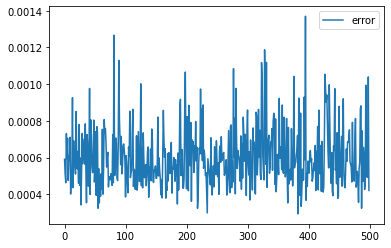

In [34]:
plt.plot(MSE_values, label = 'error')
plt.legend()
plt.show()

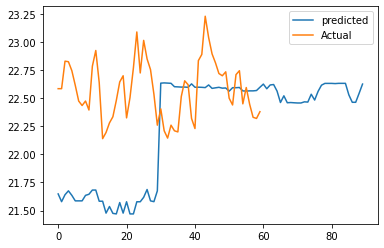

In [35]:

# Three different Prediction Windows-- time, lookback, forward, and stock_num
# Three different Prediction Windows
p1 , t1 = predict_prices(raw_df, df_closing, 60, 30, 30, 1)
p2 , t2 = predict_prices(raw_df, df_closing, 90, 30, 30, 1)
p3 , t3 = predict_prices(raw_df, df_closing, 120, 30, 30, 1)

predictions = np.concatenate([p1,p2,p3])
actuals = np.concatenate((t1,t2))

#This is a plt for the first 90 days of predictions for the first stock
plt.plot(predictions, label = 'predicted')
plt.plot(actuals, label = 'Actual')
plt.legend()
plt.show()

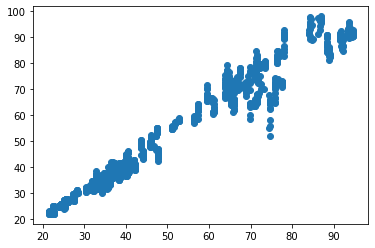

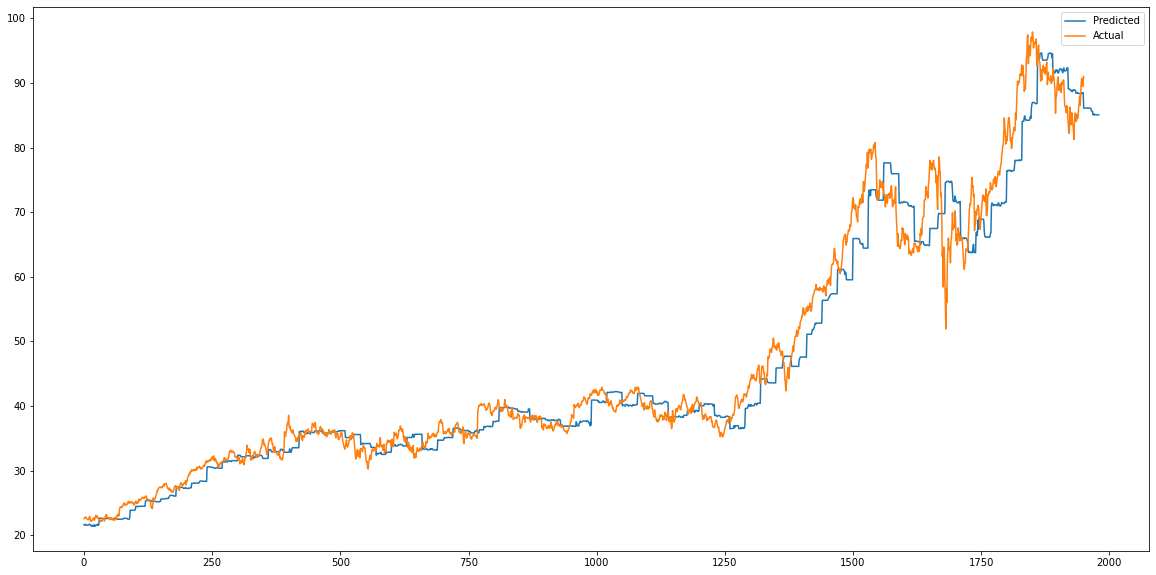

In [36]:
stock_predictions = []
stock_actuals = []

for i in range(60,df_closing.shape[0], 30):
  pred, act = predict_prices(raw_df, df_closing, i, 30, 30, 1)
  stock_predictions.append(pred)
  stock_actuals.append(act)

stock_predictions = np.concatenate(stock_predictions)
stock_actuals = np.concatenate(stock_actuals)

#Q-Q plot for predictions vs actuals
#print(stock_predictions.shape)
cap_point = len(stock_actuals)
plt.scatter(x = stock_predictions[:cap_point], y = stock_actuals)

#Full Prediction vs Actuals for the same stock
plt.figure(figsize=(20,10))
plt.plot(stock_predictions, label = 'Predicted')
plt.plot(stock_actuals, label = 'Actual')
plt.legend()
